# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, requests, time
from scipy.stats import linregress
from api_keys import weather_api_key, geoapify_key
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
lats_longs = []
cities = []
lats_range = (-90, 90)
longs_range = (-180, 180)

lats = np.random.uniform(lats_range[0], lats_range[1], size=1500)
longs = np.random.uniform(longs_range[0], longs_range[1], size=1500)
lats_longs = zip(lats, longs)

for coordinate in lats_longs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "metric"

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    Params = {"q": city, "appid": api_key, "units": units}
    city_url = requests.get(base_url, params=Params).json()
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    try:
        city_weather = city_url["weather"]
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = city_url["main"]["temp_max"]
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )
    except:
        print(f"City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | megion
Processing Record 3 of Set 1 | piacabucu
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | pankovka
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | palma sola
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | cangzhou
Processing Record 21 of Set 1 | howrah

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.91,92,53,3.94,US,1693724200
1,megion,61.0296,76.1136,16.01,50,42,7.01,RU,1693724201
2,piacabucu,-10.4056,-36.4344,23.21,85,42,4.17,BR,1693724151
3,waitangi,-43.9535,-176.5597,8.23,81,97,5.56,NZ,1693724202
4,lebu,-37.6167,-73.6500,7.55,76,100,6.29,CL,1693724202


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.91,92,53,3.94,US,1693724200
1,megion,61.0296,76.1136,16.01,50,42,7.01,RU,1693724201
2,piacabucu,-10.4056,-36.4344,23.21,85,42,4.17,BR,1693724151
3,waitangi,-43.9535,-176.5597,8.23,81,97,5.56,NZ,1693724202
4,lebu,-37.6167,-73.6500,7.55,76,100,6.29,CL,1693724202


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

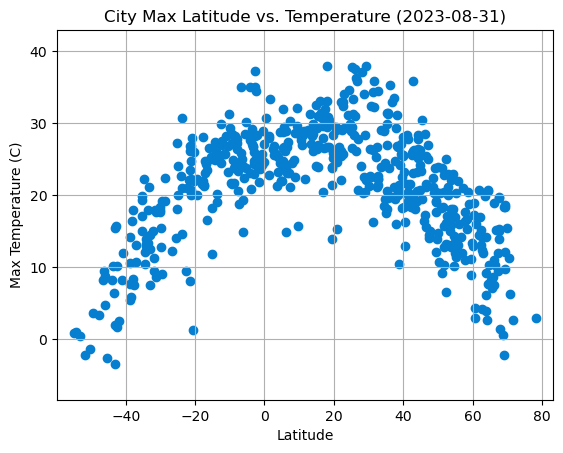

In [8]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Max Latitude vs. Temperature (2023-08-31)")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

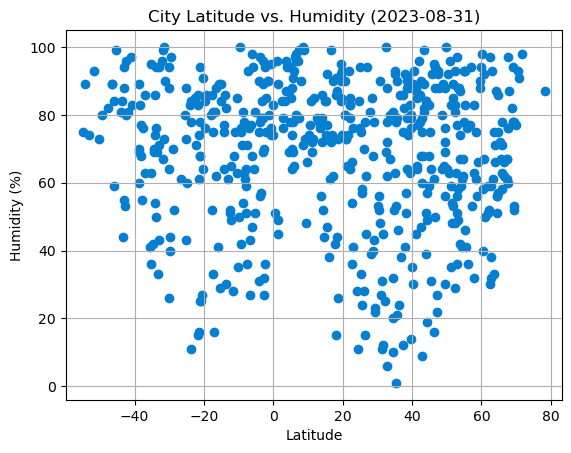

In [9]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Humidity (2023-08-31)")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

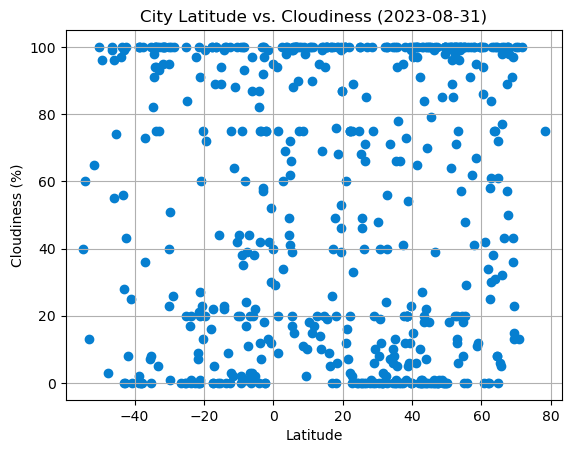

In [10]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2023-08-31)")
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

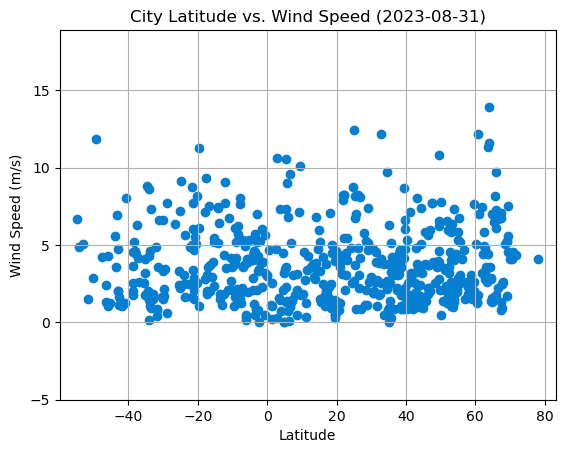

In [11]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2023-08-31)")
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.91,92,53,3.94,US,1693724200
1,megion,61.0296,76.1136,16.01,50,42,7.01,RU,1693724201
6,susuman,62.7833,148.1667,4.13,59,84,3.25,RU,1693724204
8,pankovka,58.5000,31.1999,16.69,75,67,2.34,RU,1693724205
9,albany,42.6001,-73.9662,18.29,90,1,1.41,US,1693724206


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,piacabucu,-10.4056,-36.4344,23.21,85,42,4.17,BR,1693724151
3,waitangi,-43.9535,-176.5597,8.23,81,97,5.56,NZ,1693724202
4,lebu,-37.6167,-73.6500,7.55,76,100,6.29,CL,1693724202
5,port-aux-francais,-49.3500,70.2167,3.66,80,96,11.88,TF,1693724203
7,blackmans bay,-43.0167,147.3167,15.41,55,0,4.74,AU,1693724205


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4823120651486867


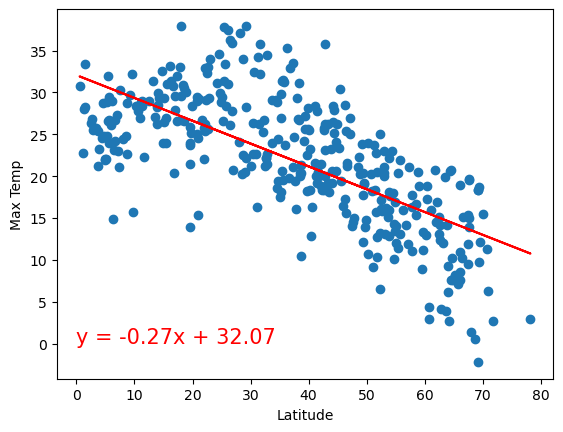

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.6892803829271716


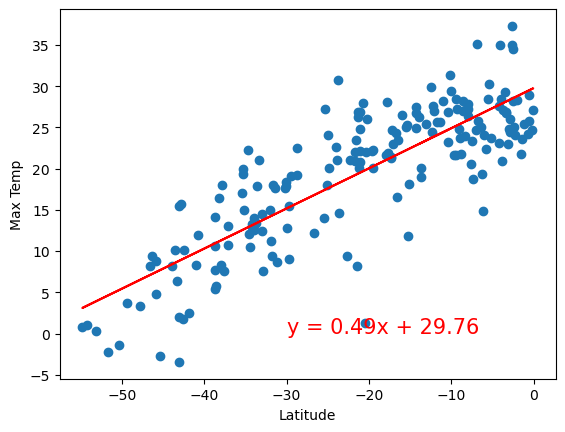

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-30, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a correlation between latitude and max tempertaure for the sample size plotted in the graph. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007216480403047585


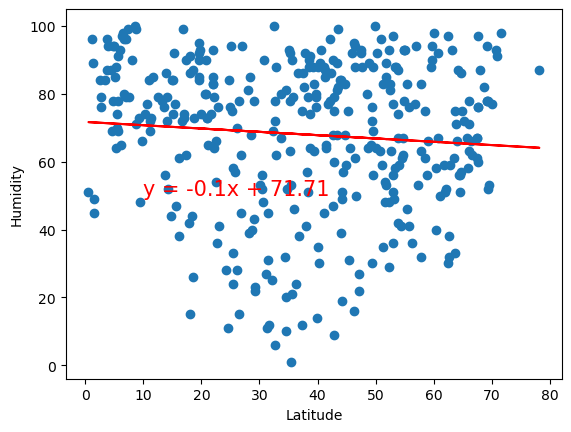

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (10, 50), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.013830677035626912


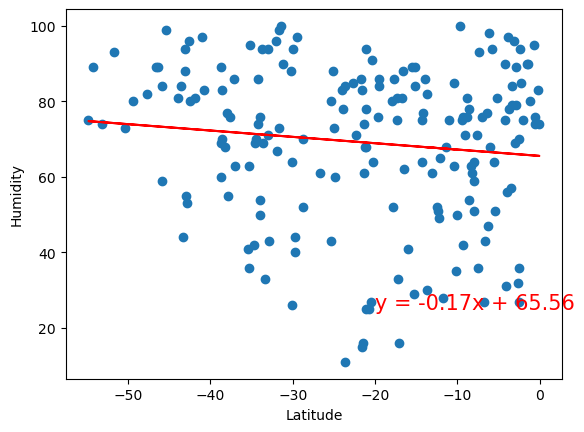

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-20, 25), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a very correlation between latitude and humidity for the sample size selected for this analysis. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00012545933636655935


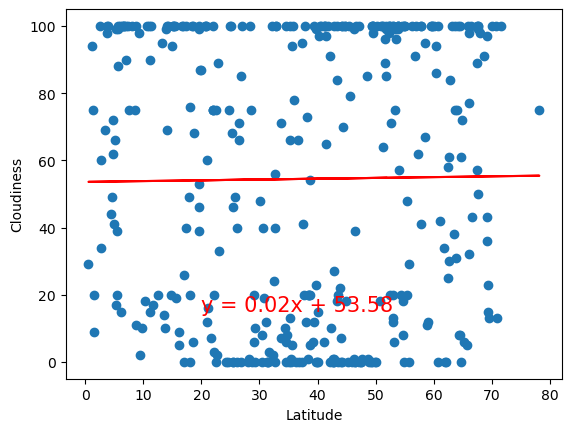

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (20, 15), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.016918493601280317


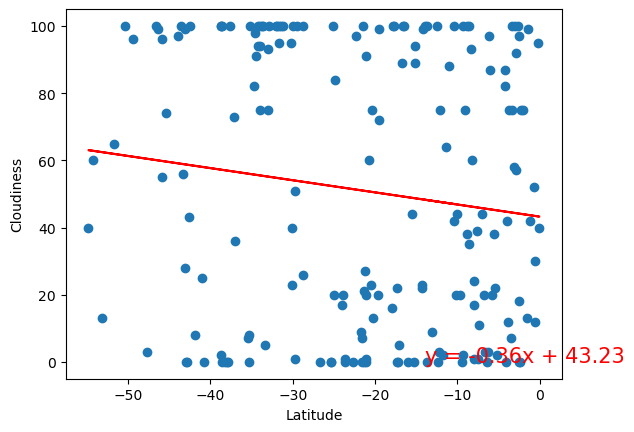

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-14, -0.04), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a very correlation between latitude and cloudiness for the sample size selected for this analysis. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011894869284990657


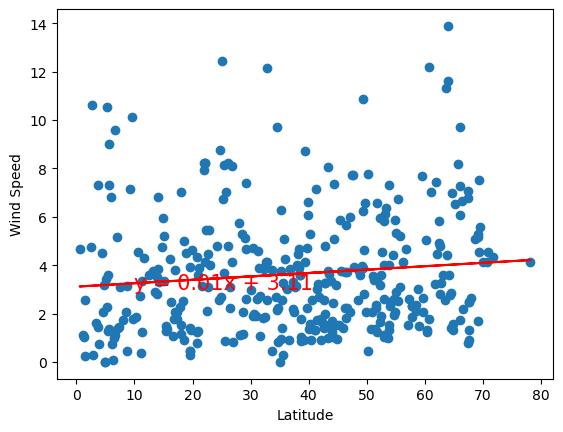

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (10, 3.0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 1.2078740182223781e-05


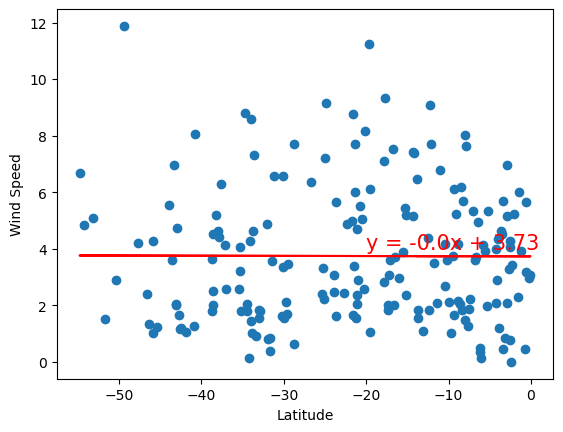

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-20, 4.0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **For the sample size selected for the analysis a good coorelation is observed between latitude and wind speed. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.**